Keval Shah
<br>
60009220061
<br>
IPCV Exp 5

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_path = "/content/car.jpg"
image = cv2.imread(img_path,1)

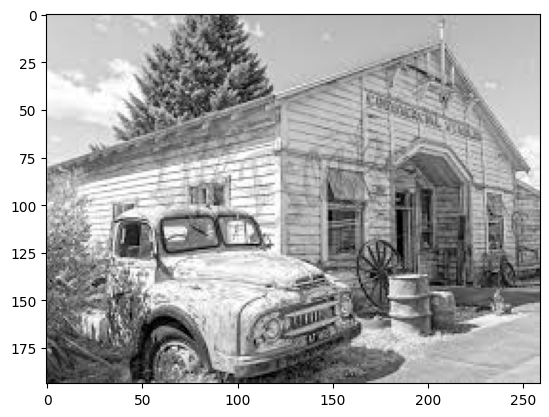

In [ ]:
plt.imshow(image,cmap='gray')

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def add_gaussian_noise(image, mean, std):
  if image.dtype != np.uint8:
        raise ValueError("Input image should be of type uint8")
  row, col = image.shape
  gauss_noise = np.random.normal(mean, std, (row, col))
  noisy_image = cv2.add(image, gauss_noise.astype(np.uint8))
  return noisy_image

array([[222, 222, 222, ..., 202, 202, 201],
       [224, 222, 220, ..., 201, 204, 200],
       [222, 223, 221, ..., 206, 203, 202],
       ...,
       [ 50,  77,  77, ..., 220, 219, 220],
       [ 77,  64,  45, ..., 224, 222, 220],
       [ 88,  49,  34, ..., 226, 222, 220]], dtype=uint8)
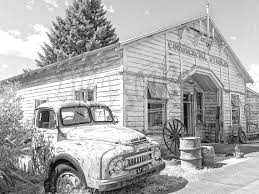

In [ ]:
add_gaussian_noise(gray_image,15,1)

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
noisy_image = add_gaussian_noise(gray_image, 15, 1)
filtered_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

In [ ]:
def show_subplot(img1, img2, img3, title1, title2, title3):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax1.set_title(title1)
    ax1.axis('off')

    ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax2.set_title(title2)
    ax2.axis('off')

    ax3.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    ax3.set_title(title3)
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def filtered_image(image, mask):
    row, col = image.shape
    mask_h, mask_w = mask.shape
    pad_h = mask_h // 2
    pad_w = mask_w // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    filtered_image = np.zeros((row, col))

    for i in range(row):
        for j in range(col):
            region = padded_image[i:i + mask_h, j:j + mask_w]
            filtered_image[i, j] = np.sum(region * mask)
    return filtered_image

In [ ]:
mask_size=3
mask = np.ones((mask_size,mask_size))/(mask_size**2)

In [ ]:
m=filtered_image(gray_image,mask)

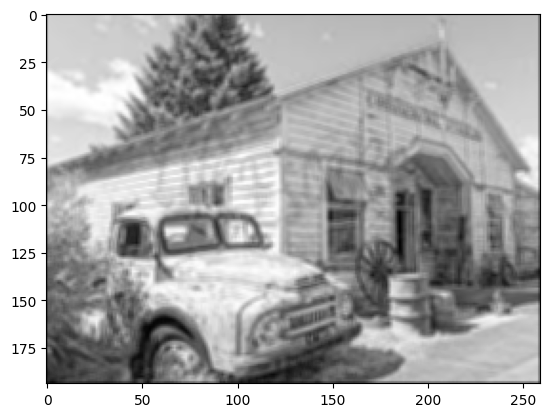

In [ ]:
plt.imshow(m,cmap='gray')

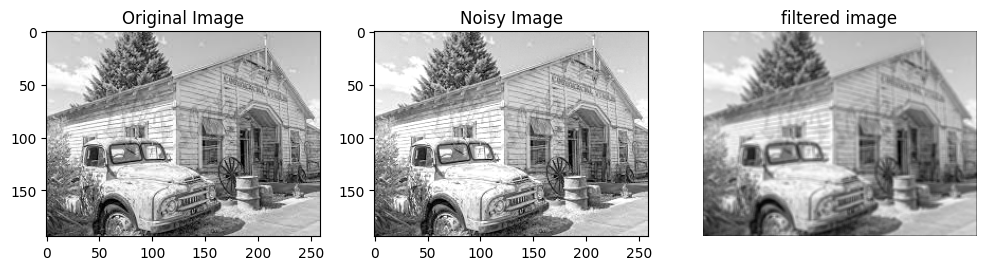

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(noisy_image,cmap='gray')
plt.title('Noisy Image')
plt.subplot(1,3,3)
plt.imshow(m,cmap='gray')
plt.title('filtered image')
plt.axis('off')
plt.show()

In [ ]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    row, col = image.shape
    noisy_image = np.copy(image)
    salt_mask = np.random.rand(row, col) < salt_prob
    noisy_image[salt_mask] = 255
    pepper_mask = np.random.rand(row, col) < pepper_prob
    noisy_image[pepper_mask] = 0

    return noisy_image

In [ ]:
noisy_image = add_salt_and_pepper_noise(gray_image, salt_prob=0.05, pepper_prob=0.03)
filtered_img = filtered_image(noisy_image, mask)

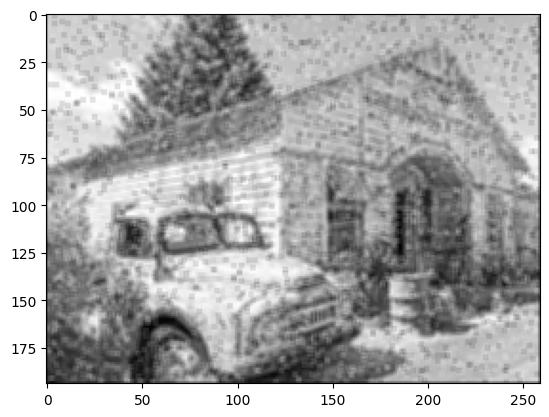

In [ ]:
plt.imshow(filtered_img,cmap='gray')

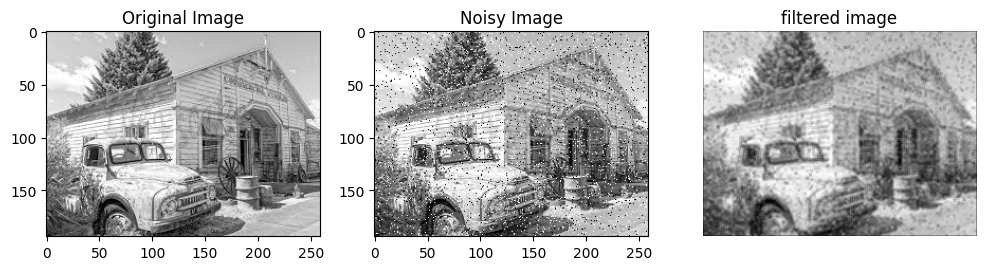

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(noisy_image,cmap='gray')
plt.title('Noisy Image')
plt.subplot(1,3,3)
plt.imshow(filtered_img,cmap='gray')
plt.title('filtered image')
plt.axis('off')
plt.show()

In [ ]:
def median_filter(image):
  row,col=image.shape
  mh,mw=3,3
  new = np.zeros((row, col), dtype=np.float64)
  for i in range(row-mh+1):
    for j in range(col-mw+1):
      rows = range(i,i+mh)
      cols = range(j,j+mw)
      part = np.sort(np.ravel(image[np.ix_(rows,cols)]))
      new[i,j] = part[5]
  return new

In [ ]:
filtered_image = median_filter(noisy_image)

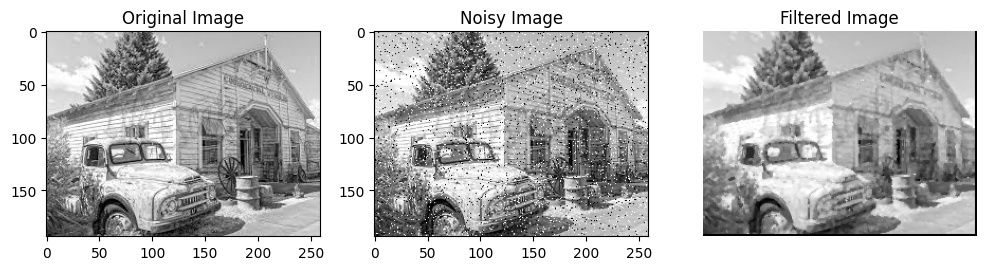

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1,3,3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

#For Coloured Images

In [ ]:
img_path = "/content/f1.jpg"
color_image = cv2.imread(img_path,1)

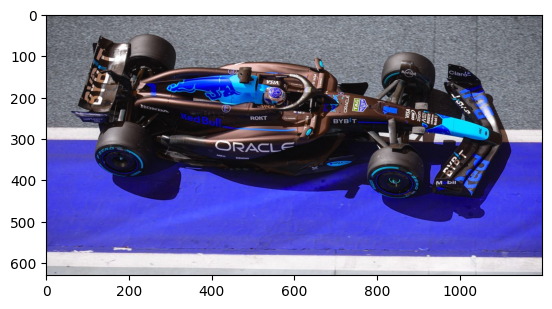

In [ ]:
plt.imshow(color_image)

In [ ]:
def add_gaussian_noise_color(image, mean, std):
    if image.dtype != np.uint8:
        raise ValueError("Input image should be of type uint8")

    row, col, ch = image.shape
    gauss_noise = np.random.normal(mean, std, (row, col, ch)).astype(np.float32)
    noisy_image = image.astype(np.float32) + gauss_noise
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image.astype(np.uint8)

In [ ]:
def median_filter_color(image):
    row, col, ch = image.shape
    mh, mw = 3, 3
    pad = 1
    new = np.zeros((row, col, ch), dtype=np.float64)

    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    for c in range(ch):
        for i in range(row):
            for j in range(col):
                p = padded_image[i:i+mh, j:j+mw, c]
                new[i, j, c] = np.median(p)

    return new.astype(np.uint8)

In [ ]:
filtered_image = median_filter_color(color_image)

In [ ]:
mean, std = 21, 25
noisy_image = add_gaussian_noise_color(color_image, mean, std)
filtered_image = median_filter_color(noisy_image)

In [ ]:
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
noisy_image_rgb = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)
filtered_image_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)

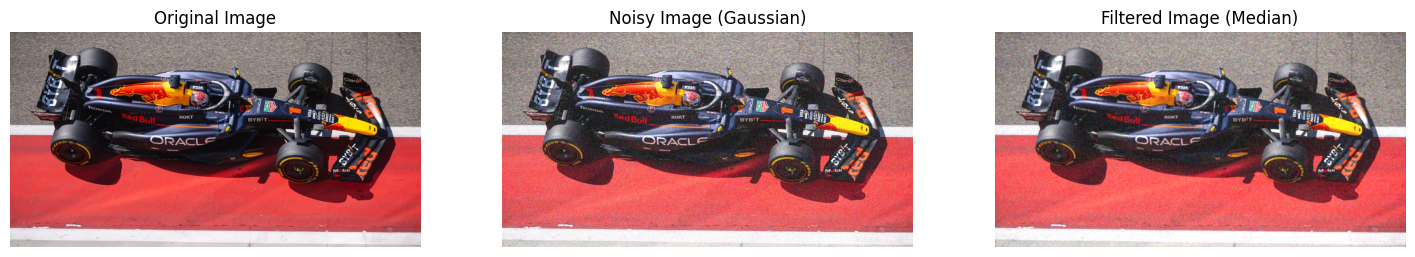

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(color_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image_rgb)
plt.title('Noisy Image (Gaussian)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_rgb)
plt.title('Filtered Image (Median)')
plt.axis('off')

plt.show()

In [ ]:
def add_salt_and_pepper_noise_color(image, salt_prob, pepper_prob):
    row, col, ch = image.shape
    noisy_image = np.copy(image)

    for c in range(ch):
        salt_mask = np.random.rand(row, col) < salt_prob
        pepper_mask = np.random.rand(row, col) < pepper_prob

        noisy_image[salt_mask, c] = 255
        noisy_image[pepper_mask, c] = 0

    return noisy_image

In [ ]:
noisy_image = add_salt_and_pepper_noise_color(color_image, 0.10, 0.08)
filtered_img = median_filter_color(noisy_image)

color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
noisy_image_rgb = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)
filtered_img_rgb = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)

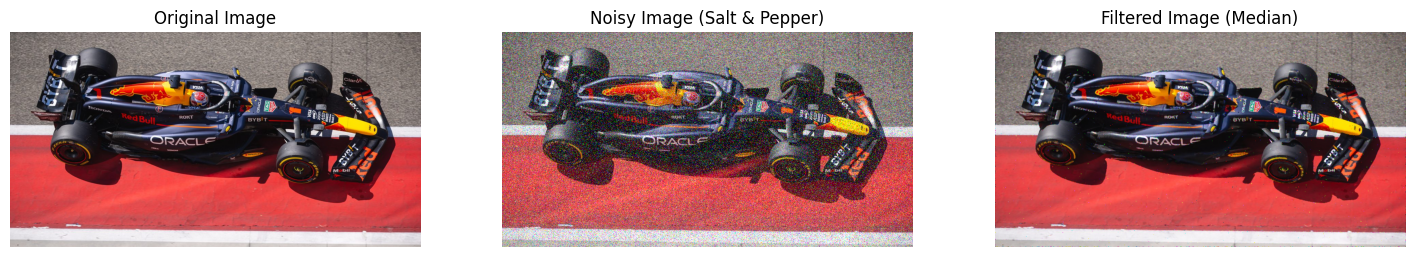

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(color_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image_rgb)
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_img_rgb)
plt.title('Filtered Image (Median)')
plt.axis('off')

plt.show()

## ***Conclusion*** <br>
This experiment demonstrated how salt-and-pepper noise affects color images and the effectiveness of median filtering in removing this noise.

* Conceptual Summary:  <br>Salt-and-pepper noise introduces random black and white pixels, which can distort an image. Median filtering addresses this by replacing each pixel with the median value of its neighborhood, effectively removing noise while preserving image details.

* Noise Impact: <br>Salt-and-pepper noise introduces visible distortions in color images.
Filtering Effectiveness: Median filtering successfully reduces noise and maintains image quality. <br>

**Applications:**

* *Image Restoration:* Essential for improving clarity in medical imaging and other fields.


* *Computer Vision:* Enhances object detection and recognition by reducing noise.



* *Photography:* Improves image quality in low-light conditions or high ISO settings.
